## Download dataset

### Configure Kaggle

In [ ]:
import os

In [ ]:
!pip install -q kaggle

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle/kaggle.json

-rw------- 1 root root 67 May 30 04:29 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                          1MB  2024-04-10 09:48:38          25865        552  1.0              
khushikhushikhushi/amazon-bestselling-books                     Amazon Bestselling Books                             4KB  2024-05-23 13:59:52            636         21  1.0              
mayankanand2701/netflix-stock-price-dataset                     Netflix Stock Price Dataset 🎥🍿🎬📊                   107KB  2024-05-25 06:59:35            711         32  1.0              
prasad22/vehicle-population-statistics                          V

### Download dataset

In [ ]:
!mkdir raw_data

In [ ]:
# Define the directories
raw_data_dir = '/content/raw_data'

# Create the directories if they don't exist
os.makedirs(raw_data_dir, exist_ok=True)

# Move to raw_data dir to download dataset
os.chdir(raw_data_dir)

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer/

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer/versions/
License(s): CC0-1.0
100% 65.0M/65.2M [00:02<00:00, 39.9MB/s]
100% 65.2M/65.2M [00:02<00:00, 27.8MB/s]


In [ ]:
!unzip emotion-detection-fer.zip -d emotion-detection-fer

In [ ]:
# Change directory back to '/content'
os.chdir('/content')
!pwd

/content


### Set up paths and constant variables

In [ ]:
# Define the paths to the training and test data
TRAINING_PATH = '/content/raw_data/emotion-detection-fer/train'
TESTING_PATH  = '/content/raw_data/emotion-detection-fer/test'

In [ ]:
# Change names of certain directories

# Define the folder name mappings
name_mapping = {
    'disgusted': 'disgust',
    'fearful': 'fear',
    'surprised': 'surprise'
}

# Function to rename directories
def rename_directories(path, name_mapping):
    for old_name, new_name in name_mapping.items():
        old_path = os.path.join(path, old_name)
        new_path = os.path.join(path, new_name)
        if os.path.exists(old_path):
            os.rename(old_path, new_path)

# Rename directories in the train path
rename_directories(TRAINING_PATH, name_mapping)

# Rename directories in the test path
rename_directories(TESTING_PATH, name_mapping)

# Verify the changes
print("Train directories:", os.listdir(TRAINING_PATH))
print("Test directories:", os.listdir(TESTING_PATH))

Train directories: ['disgust', 'fear', 'angry', 'surprise', 'neutral', 'happy', 'sad']
Test directories: ['disgust', 'fear', 'angry', 'surprise', 'neutral', 'happy', 'sad']


## Raw Data Analysis

### Data Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Training data
train_counts    = {expression: len(os.listdir(os.path.join(TRAINING_PATH, expression)))
                  for expression in os.listdir(TRAINING_PATH)}
train_counts_df = pd.DataFrame(train_counts, index=['train'])

# Testing data
test_counts     = {expression: len(os.listdir(os.path.join(TESTING_PATH, expression)))
                  for expression in os.listdir(TESTING_PATH)}
test_counts_df  = pd.DataFrame(test_counts, index=['test'])

In [ ]:
print("Number of images in training set:")
print(train_counts_df)


print("\nNumber of images in test set:")
print(test_counts_df)

Number of images in training set:
       disgust  fear  angry  surprise  neutral  happy   sad
train      436  4097   3995      3171     4965   7215  4830

Number of images in test set:
      disgust  fear  angry  surprise  neutral  happy   sad
test      111  1024    958       831     1233   1774  1247


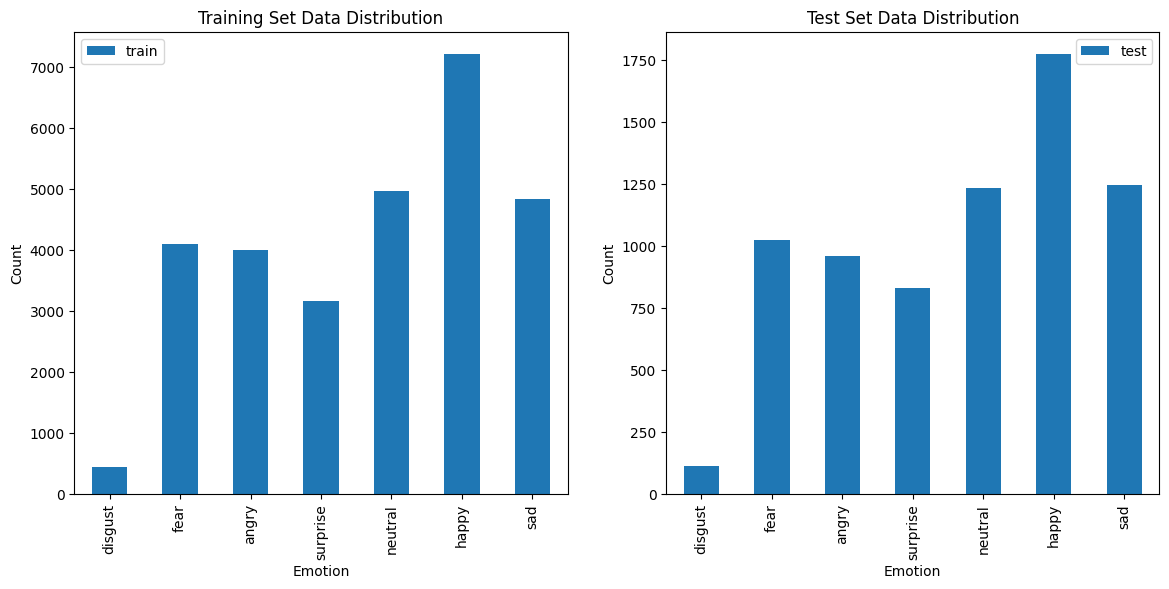

In [ ]:
# Let's understand data distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
train_counts_df.transpose().plot(kind='bar', ax=plt.gca())
plt.title('Training Set Data Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
test_counts_df.transpose().plot(kind='bar', ax=plt.gca())
plt.title('Test Set Data Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

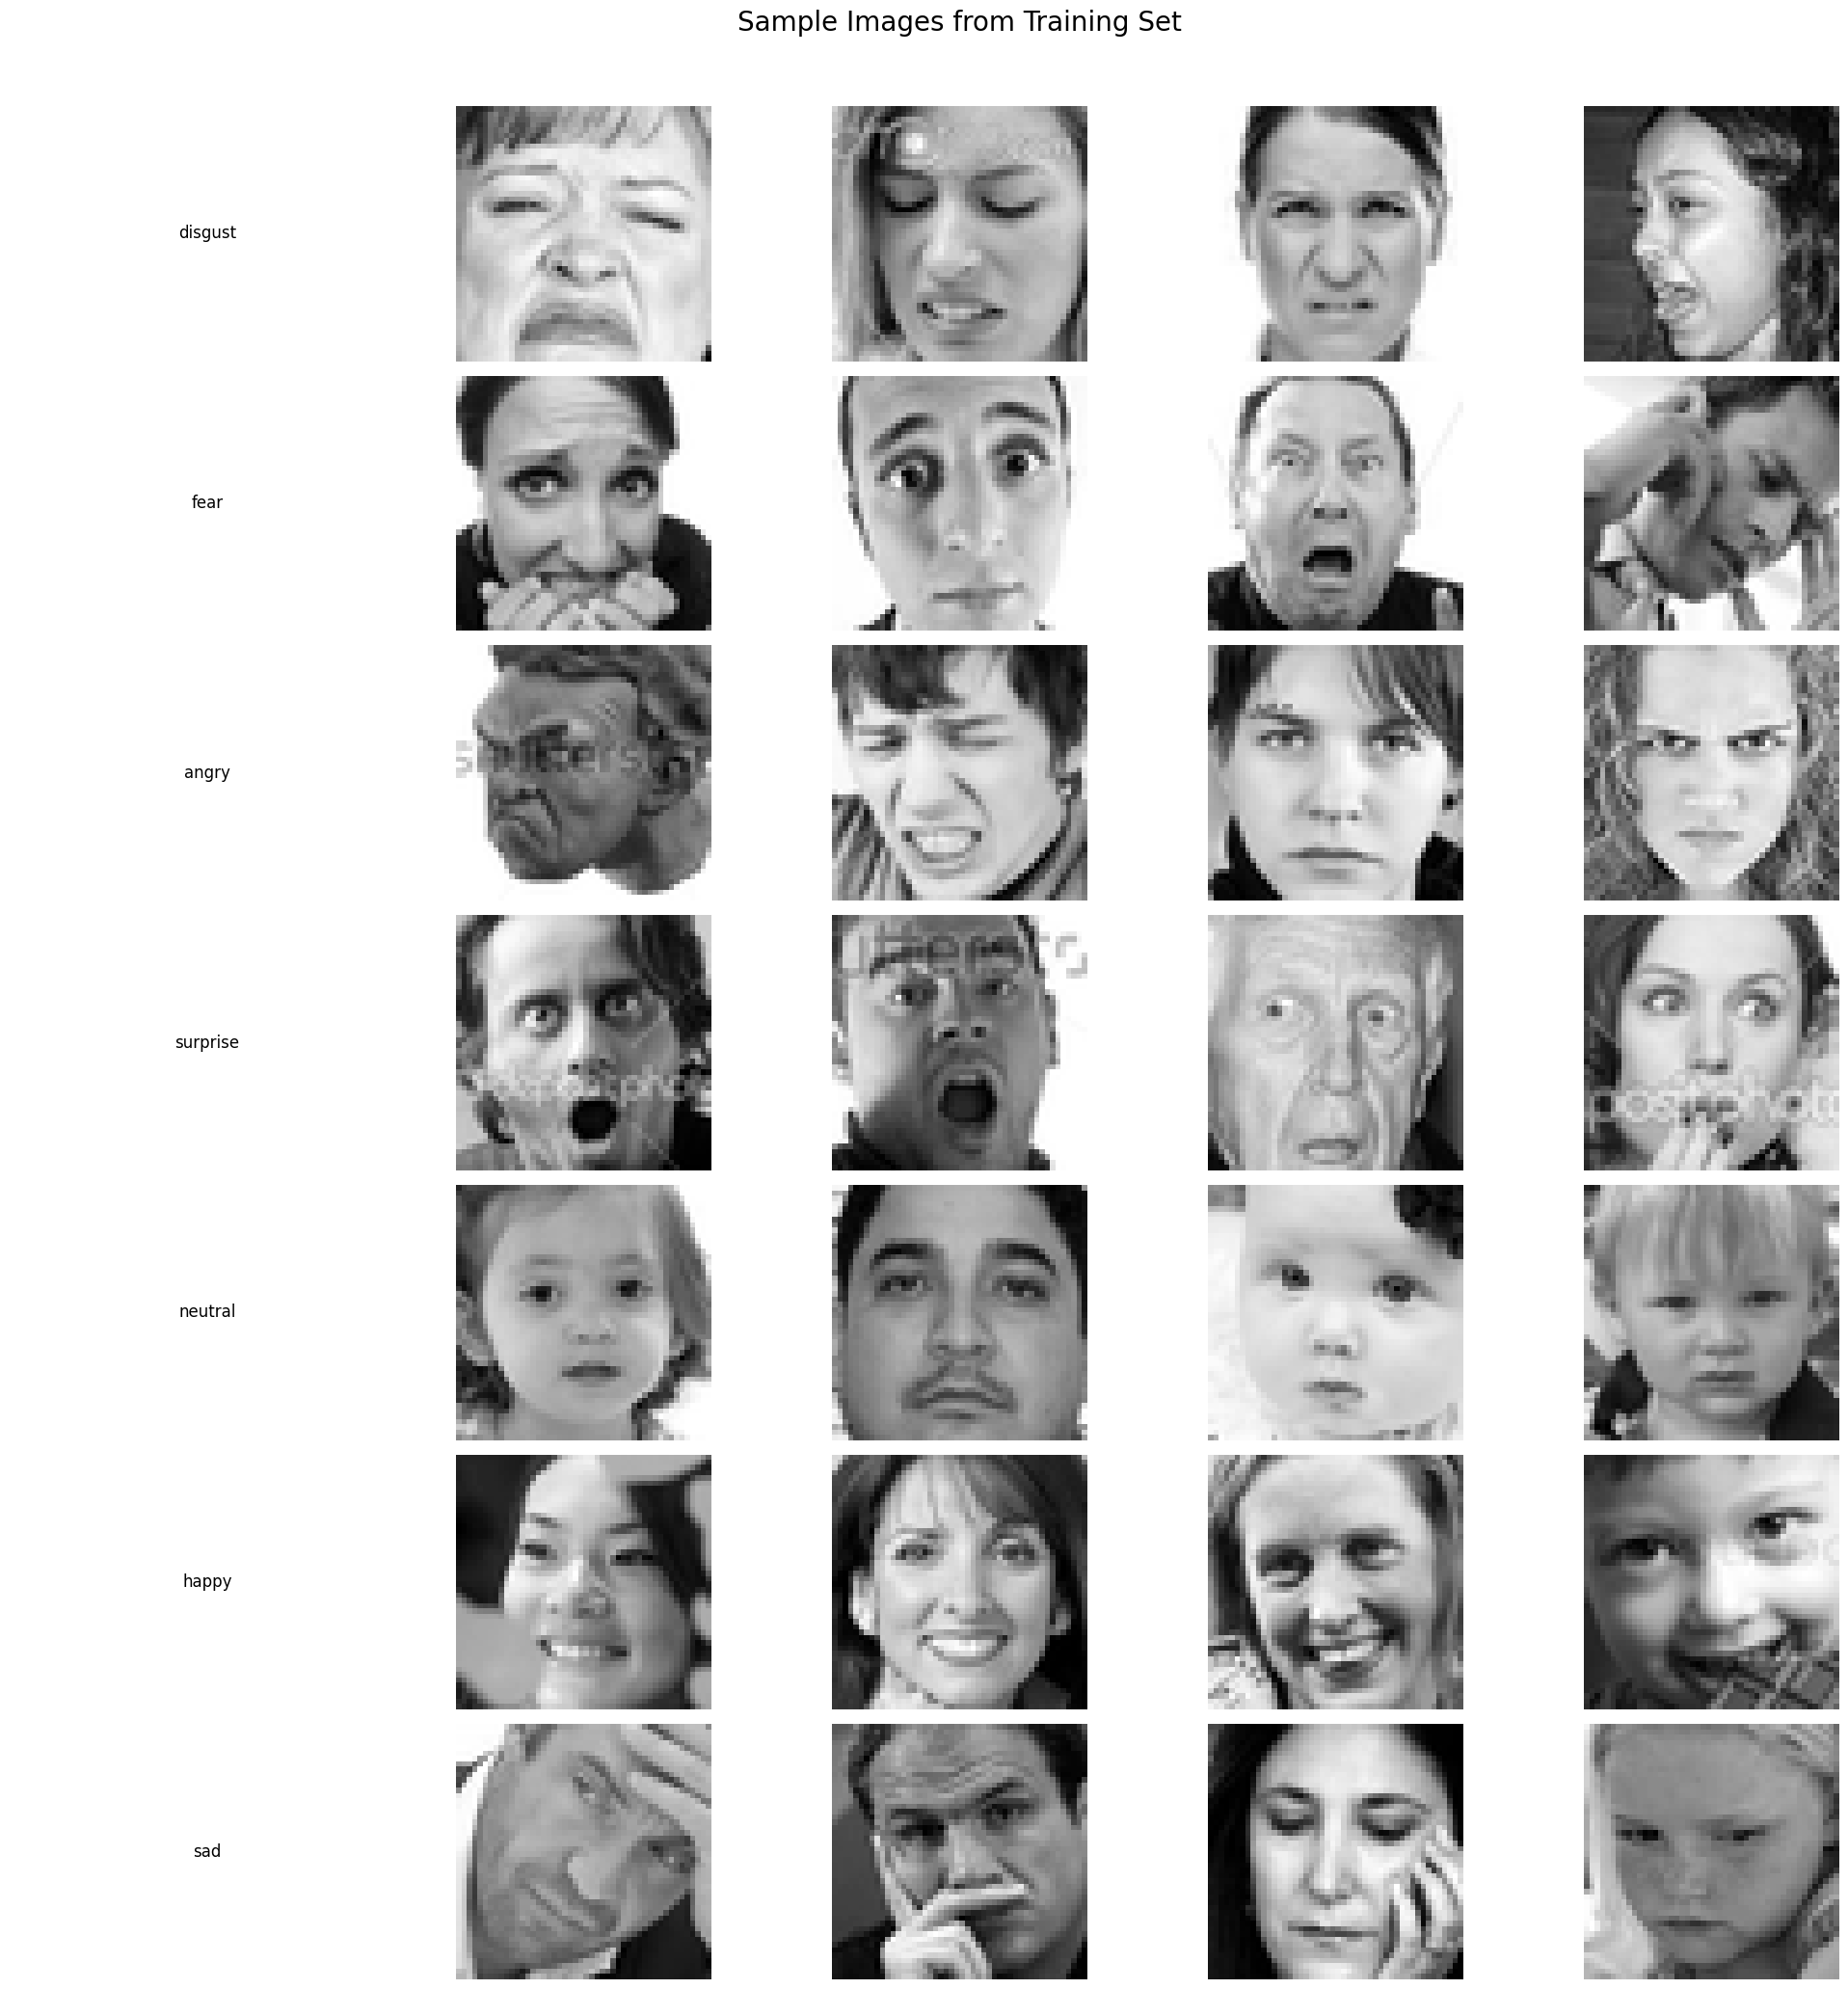

In [ ]:
# Define the number of images to display per emotion
num_images_per_emotion = 4

# Get the list of emotions (folders)
emotions = os.listdir(TRAINING_PATH)

# Calculate the total number of rows needed
num_rows = len(emotions)

# Now, let's plot sample images from each class
plt.figure(figsize=(20, num_rows * 3))

for i, emotion in enumerate(emotions):
    # Display the emotion name in the first column
    plt.subplot(num_rows, num_images_per_emotion + 1, i * (num_images_per_emotion + 1) + 1)
    plt.text(0.5, 0.5, emotion, fontsize=12, ha='center', va='center')
    plt.axis('off')

    # Display the images in the subsequent columns
    for j in range(num_images_per_emotion):
        img_path = os.path.join(TRAINING_PATH, emotion, os.listdir(os.path.join(TRAINING_PATH, emotion))[j])
        img = plt.imread(img_path)
        plt.subplot(num_rows, num_images_per_emotion + 1, i * (num_images_per_emotion + 1) + j + 2)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

plt.suptitle('Sample Images from Training Set', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

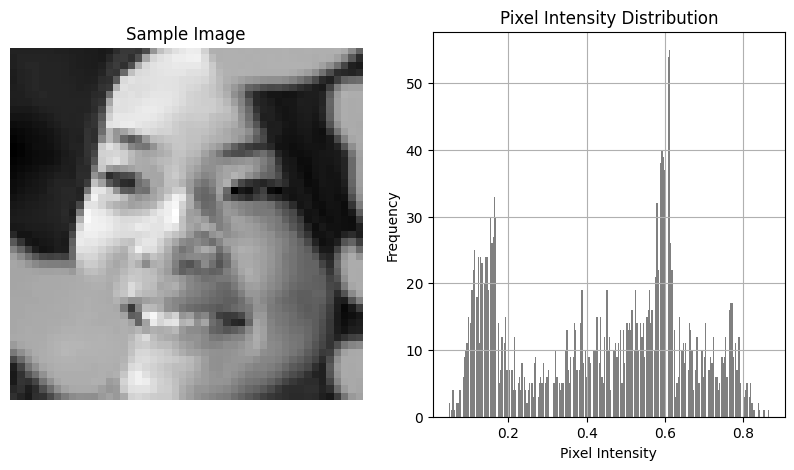

In [ ]:
# Loading and analyzing a sample image to understand pixel intensity distribution
sample_img_path = os.path.join(TRAINING_PATH, 'happy', os.listdir(os.path.join(TRAINING_PATH, 'happy'))[0])
sample_img = plt.imread(sample_img_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_img, cmap='gray')
plt.title('Sample Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(sample_img.ravel(), bins=256, color='gray')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Constants for image preprocessing

IMAGE_SIZE  = (48, 48)
BATCH_SIZE  = 64
SEED        = 42

In [ ]:
# Data preprocessing and augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    validation_split=0.2  # Split training data into training and validation
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

## Finetuning setup (data prep)

### Install libraries

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00


### Import libraries

In [ ]:
from datasets import load_dataset
from PIL import Image
import os
import json
import uuid

### Helper function to create JSON file

In [ ]:
def process_and_save(image_paths, labels, output_folder, subset_name, base_path):
    # Create directories
    subset_folder = os.path.join(output_folder, subset_name)
    os.makedirs(subset_folder, exist_ok=True)

    # Initialize list for JSON data
    json_data_list = []

    for img_path, label in zip(image_paths, labels):
        # Generate a unique ID
        unique_id = str(uuid.uuid4())

        # Make the image path relative to the base path
        relative_img_path = os.path.relpath(img_path, base_path)

        # Format for LLaVA JSON
        json_data = {
            "id": unique_id,
            "image": relative_img_path,  # Use the relative image path
            "conversations": [
                {
                    "from": "human",
                    "value": "What is the emotion detected in this image? Give output in only one word. The valid classification categories are: angry, disgust, fear, happy, neutral, sad and surprise"
                },
                {
                    "from": "gpt",
                    "value": label
                }
            ]
        }

        json_data_list.append(json_data)

    # Save JSON
    with open(os.path.join(subset_folder, 'dataset.json'), 'w') as json_file:
        json.dump(json_data_list, json_file, indent=4)

def prepare_dataset(data_dir, output_folder, subset_name, base_path):
    image_paths = []
    labels = []

    for emotion in ["happy", "sad", "disgust", "fear", "surprise", "angry", "neutral"]:
        emotion_dir = os.path.join(data_dir, emotion)
        for img_file in os.listdir(emotion_dir):
            if img_file.endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(emotion_dir, img_file))
                labels.append(emotion)

    process_and_save(image_paths, labels, output_folder, subset_name, base_path)

# Usage
output_folder = 'emotion_dataset'
base_path = '/content/raw_data/emotion-detection-fer'
prepare_dataset(os.path.join(base_path, 'train'), output_folder, 'train', base_path)
prepare_dataset(os.path.join(base_path, 'test'), output_folder, 'test', base_path)

## Finetuning setup (code and libraries config)

### Install Essential Libraries

### Essential Library 1: LLAVA

### Library installation

In [ ]:
os.chdir('/content/')
!rm -rf LLaVA

In [ ]:
import os

# Clone the repository
!git clone https://github.com/haotian-liu/LLaVA.git

# Change directory to LLaVA
os.chdir('/content/LLaVA')

# Upgrade pip
!pip install --upgrade pip

# Uninstall conflicting packages
!pip uninstall -y typer torch torchtext torchaudio

# Install compatible versions of all required packages
!pip install torch==2.3.0+cu121 torchvision==0.18.0 torchaudio==2.3.0 torchtext==0.18.0
!pip install transformers==4.37.2 tokenizers==0.15.1 sentencepiece==0.1.99
!pip install shortuuid==1.0.13 accelerate==0.21.0 peft==0.11.1 bitsandbytes==0.43.1
!pip install einops==0.8.0 einops-exts==0.0.4 timm==0.6.13 pydantic==2.7.1 markdown2==2.4.13
!pip install gradio==4.16.0 gradio-client==0.8.1 requests==2.31.0 httpx==0.24.0
!pip install uvicorn==0.30.0 fastapi==0.111.0

# Install LLaVA (editable mode)
!pip install -e .

# Verify installation
!python3 -c "import torch; print(torch.__version__)"
!python3 -c "import transformers; print(transformers.__version__)"

# Test LLaVA import
!python3 -c "import llava; print('LLaVA imported successfully')"

### Essential Library 2: Deepspeed

In [ ]:
!pip install -e ".[train]"
!pip install flash-attn --no-build-isolation
!pip install deepspeed

### Essential Library 3: wandb

In [ ]:
!pip install wandb

import wandb
wandb.login()

## Model Finetuning

### Load pretrained LLaVA

In [ ]:
from llava.model.builder  import load_pretrained_model
from llava.mm_utils       import get_model_name_from_path
from llava.eval.run_llava import eval_model

[2024-05-30 04:36:02,057] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [ ]:
LLAVA_OUTPUT_DIR = 'content/llava_finetune_output'

# Create the directories if they don't exist
os.makedirs(LLAVA_OUTPUT_DIR, exist_ok=True)

In [ ]:
#model_path = "liuhaotian/llava-v1.6-mistral-7b"
model_path = "liuhaotian/llava-v1.5-7b"

tokenizer, model, image_processor, context_len = load_pretrained_model (
    model_path      = model_path,
    model_base      = None,
    model_name      = get_model_name_from_path(model_path),
    offload_folder  = LLAVA_OUTPUT_DIR
)

### Assign paths

In [ ]:
# Set environment variable to avoid fragmentation
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"

DEEPSPEED_SCRIPT  = "deepspeed llava/train/train_mem.py"
DEEPSPEED_JSON    = "./scripts/zero3.json"
#MODEL_NAME        = "liuhaotian/llava-v1.6-mistral-7b"
MODEL_NAME        = "liuhaotian/llava-v1.5-7b"
DATA_PATH         = "/content/emotion_dataset/train/dataset.json"
IMAGE_FOLDER      = base_path
VISION_TOWER      = "openai/clip-vit-large-patch14-336"

PER_DEVICE_TRAIN_BATCH_SIZE = 24
PER_DEVICE_EVAL_BATCH_SIZE  = 4
GRADIENT_ACCUMULATION_STEPS = 2

### Train Model

In [ ]:
finetune_script = f'''
{DEEPSPEED_SCRIPT} \\
    --lora_enable True \\
    --lora_r 128 \\
    --lora_alpha 256 \\
    --mm_projector_lr 2e-5 \\
    --deepspeed {DEEPSPEED_JSON} \\
    --model_name_or_path {MODEL_NAME} \\
    --version v1 \\
    --data_path {DATA_PATH} \\
    --image_folder {IMAGE_FOLDER} \\
    --vision_tower {VISION_TOWER} \\
    --mm_projector_type mlp2x_gelu \\
    --mm_vision_select_layer -2 \\
    --mm_use_im_start_end False \\
    --mm_use_im_patch_token False \\
    --image_aspect_ratio pad \\
    --group_by_modality_length True \\
    --fp16 True \\
    --output_dir {LLAVA_OUTPUT_DIR} \\
    --num_train_epochs 2 \\
    --per_device_train_batch_size {PER_DEVICE_TRAIN_BATCH_SIZE} \\
    --per_device_eval_batch_size {PER_DEVICE_EVAL_BATCH_SIZE} \\
    --gradient_accumulation_steps {GRADIENT_ACCUMULATION_STEPS} \\
    --evaluation_strategy "no" \\
    --save_strategy "steps" \\
    --save_steps 50000 \\
    --save_total_limit 1 \\
    --learning_rate 2e-4 \\
    --weight_decay 0. \\
    --warmup_ratio 0.03 \\
    --lr_scheduler_type "cosine" \\
    --logging_steps 1 \\
    --tf32 True \\
    --model_max_length 1024 \\
    --gradient_checkpointing True \\
    --dataloader_num_workers 8 \\
    --lazy_preprocess True \\
    --report_to wandb
'''

### Clear the CUDA cache

In [ ]:
import torch
torch.cuda.empty_cache()

### Execute the finetune script

In [ ]:
!{finetune_script}

In [ ]:
os.chdir('/content')
!pwd

/content


In [ ]:
!python LLaVA/scripts/merge_lora_weights.py --model-path liuhaotian/llava-v1.5-7b-lora --model-base liuhaotian/llava-v1.5-7b --save-model-path llava-ftmodel


[2024-05-30 05:51:46,660] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2024-05-30 05:51:48.006669: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 05:51:48.006719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 05:51:48.008346: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-30 05:51:49.182941: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprec

In [ ]:
#!zip -r LLaVA-FTModel llava-ftmodel/

In [ ]:
import shutil
from google.colab import files

# Zip the folder
shutil.make_archive('/content/drive/MyDrive/Models/llava-finetuned', 'zip', '/content/llava-ftmodel')

# Download the zipped folder
#files.download('/content/llava-ftmodel.zip')

'/content/drive/MyDrive/Models/llava-finetuned.zip'

# Evaluate the model

## Prepare test data

In [ ]:
import os
import json

# Define the paths to the test data
TESTING_PATH    = '/content/raw_data/emotion-detection-fer/test'
JSON_TEST_PATH  = '/content/emotion_dataset/test/dataset.json'

# Load the test dataset
with open(JSON_TEST_PATH, 'r') as f:
    test_data = json.load(f)

# Prepare the test data
test_images   = []
test_labels   = []
test_queries  = []
question      = "What is the emotion detected in this image? Give output in only one word. The valid classification categories are: angry, disgust, fear, happy, neutral, sad and surprise"

for item in test_data:
    image_path = os.path.join('/content/raw_data/emotion-detection-fer', item['image'])
    label = item['conversations'][1]['value']
    test_images.append(image_path)
    test_labels.append(label)
    test_queries.append(question)

# Save the test queries to a JSON file
test_queries_file = '/content/emotion_dataset/test/test_queries.json'
with open(test_queries_file, 'w') as f:
    json.dump({"images": test_images, "queries": test_queries}, f, indent=4)

## Inference for single image

### Create script to run eval
The original library (eval_model) does not return any output, but just prints it out within. We can change that by creating our own version of the API and use it according to our requirements

In [ ]:
import subprocess
from PIL import Image
import torch
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model
import io
import sys

# Path to your fine-tuned model
fine_tuned_model_path = '/content/llava-ftmodel'

# Load the fine-tuned model
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=fine_tuned_model_path,
    model_base=None,  # Adjust if necessary based on your training configuration
    model_name=get_model_name_from_path(fine_tuned_model_path)
)

# Verify that the model and tokenizer are loaded correctly
print("Model and tokenizer loaded successfully.")

# Evaluation setup
prompt = question
image_file = '/content/raw_data/emotion-detection-fer/test/angry/im187.png'

# Load and preprocess the image
try:
    print(f"Opening image file: {image_file}")
    with Image.open(image_file) as img:
        print(f"Original image mode: {img.mode}")
        # Convert to RGB if the image is grayscale
        if img.mode != 'RGB':
            print("Converting image to RGB.")
            img = img.convert('RGB')

        print("Image converted to RGB successfully.")

        # Process the image with the image processor
        print("Processing image with image processor.")
        processed_image = image_processor(img, return_tensors='pt')

        # Extract the tensor from BatchFeature
        processed_image_tensor = processed_image['pixel_values']

        print(f"Extracted tensor type: {type(processed_image_tensor)}")
        print(f"Extracted tensor shape: {processed_image_tensor.shape}")
    print("Image processed successfully.")
except Exception as e:
    processed_image_tensor = None
    print(f"Error processing image: {e}")

# Define a class to hold the arguments for eval_model
class EvalArgs:
    def __init__(self, model_path, model_base, model_name, query, conv_mode, image_file, sep, temperature, top_p, num_beams, max_new_tokens, do_sample=False):
        self.model_path = model_path
        self.model_base = model_base
        self.model_name = model_name
        self.query = query
        self.conv_mode = conv_mode
        self.image_file = image_file
        self.sep = sep
        self.temperature = temperature
        self.top_p = top_p
        self.num_beams = num_beams
        self.max_new_tokens = max_new_tokens

# Context manager to capture stdout
class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = io.StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        sys.stdout = self._stdout

# Check if the image was processed successfully
if processed_image_tensor is not None:
    try:
        # Set up evaluation arguments
        args = EvalArgs(
            model_path=fine_tuned_model_path,
            model_base=None,
            model_name=get_model_name_from_path(fine_tuned_model_path),
            query=prompt,
            conv_mode=None,
            image_file=image_file,
            sep=",",
            temperature=1.0,  # Unset temperature
            top_p=0.9,        # Unset top_p
            num_beams=1,
            max_new_tokens=512
        )

        # Capture the output of eval_model
        with Capturing() as output:
            eval_model(args)

        # Extract the result from the captured output
        result = output[-1].lower()  # Assuming the result is printed last
        print("Result value:", result)
    except Exception as e:
        print(f"Error during model evaluation: {e}")
else:
    print("Failed to process image. Evaluation not performed.")

## Inference on entire test dataset

In [ ]:
import os
import json
import random
from PIL import Image
import torch
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model
import io
import sys
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Path to your fine-tuned model
MODEL_PATH = '/content/llava-ftmodel'
TEST_DATA_PATH = '/content/raw_data/emotion-detection-fer/test'
JSON_TEST_PATH = '/content/emotion_dataset/test/dataset.json'
OUTPUT_FILE = '/content/predictions.json'

# Load the fine-tuned model
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=MODEL_PATH,
    model_base=None,
    model_name=get_model_name_from_path(MODEL_PATH)
)

# Load the test dataset
with open(JSON_TEST_PATH, 'r') as f:
    test_data = json.load(f)

# Prepare the test data
test_images_by_class = {
    "angry": [],
    "disgust": [],
    "fear": [],
    "happy": [],
    "neutral": [],
    "sad": [],
    "surprise": []
}

for item in test_data:
    image_path = os.path.join('/content/raw_data/emotion-detection-fer', item['image'])
    label = item['conversations'][1]['value']
    if label in test_images_by_class:
        test_images_by_class[label].append(image_path)

# Number of predictions to consider
num_of_pred = 50
num_classes = len(test_images_by_class)
images_per_class = num_of_pred // num_classes
remainder = num_of_pred % num_classes

selected_images = []

# Select images_per_class images from each class
for label in test_images_by_class:
    selected_images.extend(random.sample(test_images_by_class[label], images_per_class))

# Add remaining images from the first class
first_class_label = list(test_images_by_class.keys())[0]
selected_images.extend(random.sample(test_images_by_class[first_class_label], remainder))

# Prepare queries for the selected images
test_queries = [question] * len(selected_images)

# Context manager to capture stdout
class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = io.StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        sys.stdout = self._stdout

# Clear CUDA caches
import torch
torch.cuda.empty_cache()

# Run inference for each selected image
predictions = []

for image_path, query in zip(selected_images, test_queries):
    # Load and preprocess the image
    try:
        with Image.open(image_path) as img:
            if img.mode != 'RGB':
                img = img.convert('RGB')
            processed_image = image_processor(img, return_tensors='pt')
            processed_image_tensor = processed_image['pixel_values']
    except Exception as e:
        processed_image_tensor = None
        print(f"Error processing image: {e}")
        predictions.append({"image": image_path, "prediction": None, "error": str(e)})
        continue

    # Define a class to hold the arguments for eval_model
    class EvalArgs:
        def __init__(self, model_path, model_base, model_name, query, conv_mode, image_file, sep, temperature, top_p, num_beams, max_new_tokens, do_sample=False):
            self.model_path = model_path
            self.model_base = model_base
            self.model_name = model_name
            self.query = query
            self.conv_mode = conv_mode
            self.image_file = image_file
            self.sep = sep
            self.temperature = temperature
            self.top_p = top_p
            self.num_beams = num_beams
            self.max_new_tokens = max_new_tokens
            self.do_sample = do_sample

    # Set up evaluation arguments
    args = EvalArgs(
        model_path=MODEL_PATH,
        model_base=None,
        model_name=get_model_name_from_path(MODEL_PATH),
        query=query,
        conv_mode=None,
        image_file=image_path,
        sep=",",
        temperature=1.0,  # Explicitly set temperature
        top_p=1.0,        # Explicitly set top_p
        num_beams=1,
        max_new_tokens=512,
        do_sample=True    # Set do_sample to True to match the temperature setting
    )

    # Retry inference until a valid prediction is made
    while True:
        try:
            # Capture the output of eval_model
            with Capturing() as output:
                eval_model(args)

            # Extract the result from the captured output
            result = output[-1].lower()  # Assuming the result is printed last
            if result in test_images_by_class.keys():
                predictions.append({"image": image_path, "prediction": result})
                break  # Exit the loop if the prediction is valid
            else:
                print(f"Invalid prediction '{result}' for image: {image_path}. Retrying...")
        except Exception as e:
            print(f"Error during model evaluation: {e}")
            predictions.append({"image": image_path, "prediction": None, "error": str(e)})
            break

# Save predictions to a JSON file
with open(OUTPUT_FILE, 'w') as f:
    json.dump(predictions, f, indent=4)

print(f"Predictions saved to {OUTPUT_FILE}")

# Filter out None and unknown predictions and corresponding true labels
valid_predictions = [pred for pred in predictions if pred["prediction"] is not None and pred["prediction"] != "unknown"]
valid_predicted_labels = [pred["prediction"] for pred in valid_predictions]
valid_true_labels = []

for pred in valid_predictions:
    for label, paths in test_images_by_class.items():
        if pred["image"] in paths:
            valid_true_labels.append(label)
            break

# Debug: Print the unexpected labels
expected_labels = set(test_images_by_class.keys())
unexpected_true_labels = set(valid_true_labels) - expected_labels
unexpected_predicted_labels = set(valid_predicted_labels) - expected_labels

print(f"Unexpected true labels: {unexpected_true_labels}")
print(f"Unexpected predicted labels: {unexpected_predicted_labels}")

# Check for unexpected values in true_labels and predicted_labels
if unexpected_true_labels or unexpected_predicted_labels:
    print(f"Unexpected true labels: {unexpected_true_labels}")
    print(f"Unexpected predicted labels: {unexpected_predicted_labels}")
    raise ValueError("Found unexpected labels in the data")

# Ensure the lengths of true_labels and predicted_labels match
if len(valid_true_labels) != len(valid_predicted_labels):
    raise ValueError("The number of true labels and predicted labels do not match!")

# Calculate accuracy
accuracy = accuracy_score(valid_true_labels, valid_predicted_labels)

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(valid_true_labels, valid_predicted_labels, labels=list(test_images_by_class.keys()), average=None, zero_division=0)

# Calculate macro-averaged precision, recall, and F1-score
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(valid_true_labels, valid_predicted_labels, labels=list(test_images_by_class.keys()), average='macro', zero_division=0)

# Generate classification report
class_report = classification_report(valid_true_labels, valid_predicted_labels, labels=list(test_images_by_class.keys()), zero_division=0)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Class-wise precision, recall, and F1-score:")
for label, p, r, f in zip(test_images_by_class.keys(), precision, recall, f1):
    print(f"{label}: Precision={p:.4f}, Recall={r:.4f}, F1-score={f:.4f}")

print(f"Macro-averaged Precision: {macro_precision:.4f}")
print(f"Macro-averaged Recall: {macro_recall:.4f}")
print(f"Macro-averaged F1-score: {macro_f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(class_report)

### Output
Accuracy: 0.4000
Class-wise precision, recall, and F1-score:
angry: Precision=0.4000, Recall=0.2500, F1-score=0.3077
disgust: Precision=0.2500, Recall=0.1429, F1-score=0.1818
fear: Precision=0.0000, Recall=0.0000, F1-score=0.0000
happy: Precision=0.5000, Recall=1.0000, F1-score=0.6667
neutral: Precision=0.0000, Recall=0.0000, F1-score=0.0000
sad: Precision=0.3000, Recall=0.8571, F1-score=0.4444
surprise: Precision=0.8000, Recall=0.5714, F1-score=0.6667
Macro-averaged Precision: 0.3214
Macro-averaged Recall: 0.4031
Macro-averaged F1-score: 0.3239

### Classification Report:

|  emotion  |  precision  |  recall  |  f1-score  |  support |
|-----------|-------------|----------|------------|----------|
|    angry  |     0.40    |   0.25   |    0.31    |     8    |
|  disgust  |     0.25    |   0.14   |    0.18    |     7    |
|    fear   |     0.00    |   0.00   |    0.00    |     7    |
|   happy   |     0.50    |   1.00   |    0.67    |     7    |
|  neutral  |     0.00    |   0.00   |    0.00    |     7    |
|    sad    |     0.30    |   0.86   |    0.44    |     7    |
| surprise  |     0.80    |   0.57   |    0.67    |     7    |
| accuracy  |      --     |    --    |    0.40    |    50    |
| macro avg |     0.32    |   0.40   |    0.32    |    50    |
|weighted avg|    0.32    |   0.40   |    0.32    |    50    |


# Performance Metrics (visually)

The validation was performed on a limited dataset of 50 images due to budget constraints on GPU usage. The dataset was balanced across seven emotion categories: angry, disgust, fear, happy, neutral, sad, and surprise. The goal was to assess the model’s performance in classifying these emotions.

The overall accuracy of the model on the validation set is 40%. This means that 40% of the predictions made by the model matched the true labels.

## Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_true_labels, valid_predicted_labels, labels=list(test_images_by_class.keys()))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_images_by_class.keys()), yticklabels=list(test_images_by_class.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Bar plot for precision, recall, and F1-score for each class
metrics = precision_recall_fscore_support(valid_true_labels, valid_predicted_labels, labels=list(test_images_by_class.keys()), zero_division=0)
labels = list(test_images_by_class.keys())
precision = metrics[0]
recall = metrics[1]
f1 = metrics[2]

x = range(len(labels))

plt.figure(figsize=(12, 8))

plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.4 for p in x], f1, width=0.2, label='F1-Score', align='center')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall and F1-Score for Each Class')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.show()

### Analysis

Insights from Confusion Matrix

	•	Angry: Often confused with “disgust” and “sad”.
	•	Disgust: Predicted as “angry”, “fear”, and “surprise”.
	•	Fear: Frequently misclassified as “disgust” and “sad”.
	•	Happy: All “happy” images were correctly classified.
	•	Neutral: Misclassified primarily as “happy”.
	•	Sad: Predicted as “neutral” and “surprise” occasionally.
	•	Surprise: Some confusion with “sad”.

In [ ]:
# Bar plot for precision, recall, and F1-score for each class
metrics = precision_recall_fscore_support(valid_true_labels, valid_predicted_labels, labels=list(test_images_by_class.keys()), zero_division=0)
labels = list(test_images_by_class.keys())
precision = metrics[0]
recall = metrics[1]
f1 = metrics[2]

x = range(len(labels))

plt.figure(figsize=(12, 8))

plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.4 for p in x], f1, width=0.2, label='F1-Score', align='center')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall and F1-Score for Each Class')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.show()

### Analysis

	1.	High Precision and Recall for “Happy”: The model shows excellent performance in detecting “happy” faces, as indicated by high precision (0.5000) and perfect recall (1.0000).
	2.	Struggles with “Fear” and “Neutral”: The model fails to accurately predict “fear” and “neutral” emotions, resulting in zero precision, recall, and F1-score for these categories.
	3.	Moderate Performance for “Sad” and “Surprise”: The model performs moderately well for “sad” and “surprise” emotions, with F1-scores of 0.4444 and 0.6667, respectively.
	4.	Confusion Among Certain Emotions: There is notable confusion among similar emotions like “angry” and “disgust”, and “sad” and “neutral”.

## Conclusion

The model demonstrates promising performance in certain categories such as “happy” and “surprise”, but struggles with others, particularly “fear” and “neutral”. Further training on a larger and more diverse dataset, along with hyperparameter tuning, may help improve the overall accuracy and class-wise performance.